Zadanie zaliczeniowe Text mining - NLP


Wykonała: Ola Jaglińska gr. 3

Źródło danych: https://www.kaggle.com/datasets Zbiór: Trip Advisor Hotel Reviews

Cel: Przewidzenie oceny (liczby gwiazdek) na podstawie recezji na tripadvisor.

Metoda: analiza sentymentu

1. Zapoznanie z danymi
2. Wstępna eksploracja (najczęściej występujące słowa, usuwanie stopwordsów)
3. Czyszczenie danych
4. Tokenizacja na słowa
5. Lematyzacja WordNet
6. Textblob
7. Vader
8. Bag of Words
9. Bag of Words z IF-IDF

In [120]:
import os
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import seaborn as sns
import matplotlib.pyplot as plt
from collections import  Counter
from tqdm import tqdm
%matplotlib inline

1. Zapoznanie się z danymi

In [121]:
os.getcwd()

'/home/mion/s/284/ojaglins/TM_in_python_PW-main'

In [122]:
data = pd.read_csv("tripadvisor_hotel_reviews.csv")
data.head()

,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept, got room night no, 1st drop desk, called maintainence came look thermostat told play settings happy digital box wo n't work, asked wakeup 10am morning did n't happen, called later 6pm nap wakeup forgot, 10am wakeup morning yep forgotten.the bathroom facilities great room surprised room sold whirlpool bath tub n't bath amenities, great relax water jets going,",3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish n

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [124]:
data["Rating"].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

Zbiór danych składa się z dwóch kolumn - recenzji oraz oceny w skali 1-5. Wszystkich wierszy jest 20491, prawie połowa została oceniona na 5 gwiazdek, jedynie 1400 hoteli oceniono na 1 gwiazdkę.

2. Wstępna eksploracja

In [125]:
pd.set_option('display.max_colwidth', 500)
data.head()

,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer,...",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred gue...",2
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger...",3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless internet hotel worked suite 2 laptops, decor lovely eclectic mix pattens color palatte, animal print bathro...",5
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called started making comments girlfriend cell phone buddy, took second realize just said fact speak language face priceless, ass told, said large city, told head doorman issue called cab company promply answer...",5


Badam rozmiary recenzji -> Czy są jakieś podejrzanie długie, podejrzanie krótkie.?

count    20491.000000
mean       104.375824
std        100.656586
min          7.000000
25%         48.000000
50%         77.000000
75%        124.000000
max       1931.000000
Name: Review, dtype: float64

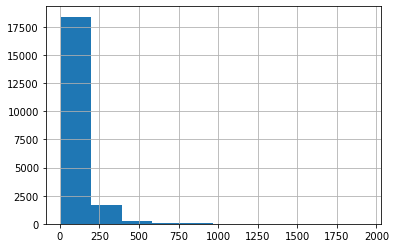

In [126]:
word_count = data['Review'].str.split().map(lambda x: len(x))
word_count.hist()
word_count.describe()

Średnia ilość słów: 104 
Najkrótsza recenzja: 7 słów -> Brzmi realnie
Najdłuższa recenzja: 1931 słów -> Sprawdzę ją, czy nie ma jakichś dziwnych treści lub duplikatów.

In [127]:
length = data["Review"].str.split("\\s+")

print("Max number of words = ", length.str.len().max())
print("Index = ", length.str.len().idxmax())

Max number of words =  1932
Index =  7072


In [128]:
pd.set_option("display.max_colwidth", -1)
print(data.iloc[7072])

Review    honest review visit 5/21-5/28 let begin saying heard secrets couple work went resort year returned raving experiences, all-inclusive regular cruise traveler past 4 years decided based word-of-mouth secrets place try.i read posts site daily, review written resort scoured eyes, reviews gotten good suspected staff secrets writing, fact person posted review claimed saw staff members reading posting forum, ca n't say stay excellence club saw type activity going wo n't past hotel ratings high posting positive reviews.in case read totally honest review secrets felt all-inclusive experience, end review include link photo page think enjoy.i booked trip judy maria travel internet, no travel agent travel site pop did search booking resort, went site saw photos judy maria resort chumming general manager, felt dealing travel agents knew resort took chance booking, great gamble, maria gave great price suggested perfect room location took travel worries hands, admit nervous n't room wanted 

/opt/jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


Wygląda ok, po prostu kogoś poniosło przy pisaniu recenzji.
Badam korpus i najczęstsze słowa

In [129]:
corpus = []
for x in data['Review'].str.split():
    corpus.extend(x)

In [130]:
counter=Counter(corpus)
most=counter.most_common()
print(most[0:10])

[('hotel', 42079), ('not', 30750), ('room', 30532), ('great', 18732), ("n't", 18436), ('staff', 14950), ('good', 14791), ('did', 13433), ('just', 12458), ('stay', 11376)]


Wygląda na to, że stosowanie skrótów n't jest bardzo popularne. Z jakiegoś powodu przed n't jest spacja i jest to traktowane jako oddzielny wyraz.

Podmienię skróty na pełne wyrażenia

In [131]:
contractions_dict = {
"ca n't": "cannot", "wo n't": "will not", "n't": "not", "ain't": "am not / are not", "aren't": "are not / am not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not",
"hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he had / he would", "he'd've": "he would have", "he'll": "he shall / he will", "he'll've": "he shall have / he will have", "he's": "he has / he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how has / how is", "i'd": "I had / I would", "i'd've": "I would have",
"i'll": "I shall / I will", "i'll've": "I shall have / I will have", "i'm": "I am", "i've": "I have", "isn't": "is not", "it'd": "it had / it would", "it'd've": "it would have", "it'll": "it shall / it will", "it'll've": "it shall have / it will have", "it's": "it has / it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have",
"must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she had / she would", "she'd've": "she would have", "she'll": "she shall / she will", "she'll've": "she shall have / she will have", 
"she's": "she has / she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so as / so is", "that'd": "that would / that had", "that'd've": "that would have", "that's": "that has / that is", "there'd": "there had / there would", "there'd've": "there would have", "there's": "there has / there is", "they'd": "they had / they would", "they'd've": "they would have",
"they'll": "they shall / they will", "they'll've": "they shall have / they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we had / we would","we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what shall / what will", "what'll've": "what shall have / what will have",
"what're": "what are", "what's": "what has / what is", "what've": "what have", "when's": "when has / when is", "when've": "when have", "where'd": "where did", "where's": "where has / where is", "where've": "where have", "who'll": "who shall / who will", "who'll've": "who shall have / who will have", "who's": "who has / who is", "who've": "who have", "why's": "why has / why is", "why've": "why have", "will've": "will have",
"won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have","y'all're": "you all are", "y'all've": "you all have", "you'd": "you had / you would", "you'd've": "you would have", "you'll": "you shall / you will", "you'll've": "you shall have / you will have", "you're": "you are", "you've": "you have"
}

In [132]:
contractions_re = re.compile('(%s)'%'|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, s)

In [133]:
tqdm.pandas()
data["Review_expanded_contractions"] = data['Review'].progress_apply(expand_contractions)

100%|██████████| 20491/20491 [00:03<00:00, 5547.51it/s]


In [134]:
data.head()

,Review,Rating,Review_expanded_contractions
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,"
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20t

In [135]:
corpus = []
for x in data['Review_expanded_contractions'].str.split():
    corpus.extend(x)

In [136]:
counter=Counter(corpus)
most=counter.most_common()
print(most[0:10])

[('not', 47381), ('hotel', 42079), ('room', 30532), ('great', 18732), ('staff', 14950), ('good', 14791), ('did', 13445), ('just', 12458), ('stay', 11376), ('no', 11360)]


In [137]:
first_n = 40
x, y= [], []
for word,count in most[:first_n]:
        x.append(word)
        y.append(count)

40 najczęściej występujących slów w korpusie


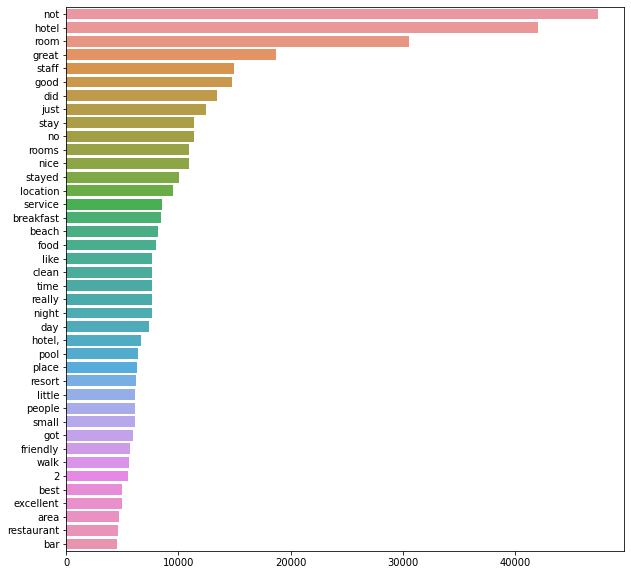

In [138]:
plt.figure(figsize=(10, 10))
sns.barplot(x=y,y=x)
print(f"{first_n} najczęściej występujących slów w korpusie")

Usuwam stopwordsy wg zbioru NLTK z wyłączniem według mnie znaczących

In [139]:
nltk.download('stopwords')
stop = stopwords.words('english')
needed_stop = ['very', 'not', 'most', 'more', 'no']
stop = list(set(stop)-set(needed_stop))
print(stop)

['each', 'am', 'been', 'against', 'while', 'll', "shouldn't", 'from', 'out', 'ourselves', 'a', "hadn't", "wasn't", 'as', 'weren', "doesn't", 're', 'had', 'of', 'off', 'to', 'will', "that'll", 'being', 'didn', 'shan', 'about', 'himself', 'does', "hasn't", 'just', "she's", 've', 'are', 'who', 'because', 'these', 'between', 'before', 'both', 'won', 'it', 'your', 'doing', "mightn't", "won't", "haven't", 'hers', 'our', 'or', "should've", "you'd", "you've", 'her', 'i', 'mightn', 'that', 'they', 'is', "you'll", 'here', 'aren', "isn't", 'doesn', 'did', 'at', 'below', 'their', "wouldn't", 'other', 'down', 'any', 'over', "needn't", 'how', 'wasn', 'there', 'wouldn', 'him', 'isn', 'why', 'yourself', "weren't", "aren't", 'itself', 'too', 'the', 'all', 'once', 'hadn', 'by', 'so', 'further', 'me', 'on', 'again', "didn't", 'do', 'have', 'up', 'after', 'some', 'than', 'above', "you're", 'don', 'such', 'can', 'haven', 'needn', "shan't", "mustn't", 'own', 'should', 'this', 'those', 's', 'and', 'y', 'wher

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mion/s/284/ojaglins/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [140]:
first_n = 40
x, y= [], []
for word,count in most[:first_n]:
    if word not in stop:
        x.append(word)
        y.append(count)

40 najczęściej występujących slów w korpusie


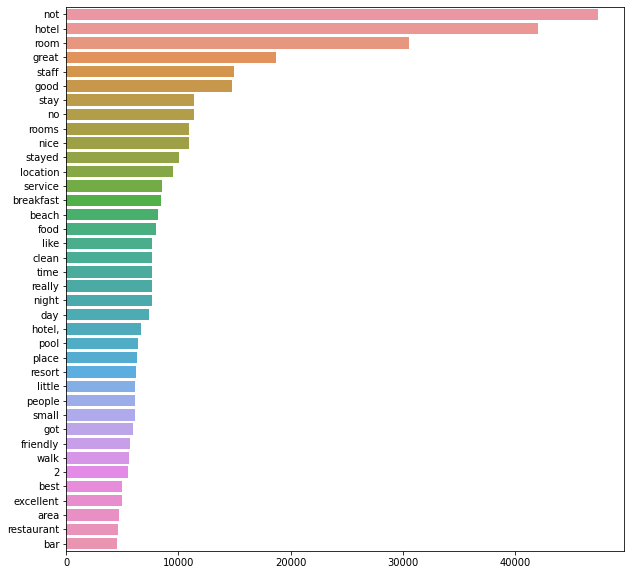

In [141]:
plt.figure(figsize=(10, 10))
sns.barplot(x=y,y=x)
print(f"{first_n} najczęściej występujących slów w korpusie")

3. Czyszczenie danych

Zamieniam wielkie litery na małe, usuwam cyfry (w popularnych słowach było '2') i interpunkcję, ale oznaczam emotikonki (mogą mieć znaczenie, gdyby się gdzieś pojawiły)

In [142]:
def preprocessor(text):
    text = re.sub('[\d]', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [143]:
example = data.loc[2, 'Review']
print(preprocessor(example))

nice rooms not experience hotel monaco seattle good hotel n t level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup calls concierge busy hard touch did n t provide guidance special requests tv hard use ipod sound dock suite non functioning decided book mediterranean suite night weekend stay st choice rest party filled comparison w spent night larger square footage room great soaking tub whirlpool jets nice shower before stay hotel arrange car service price tip reasonable driver waiting arrival checkin easy downside room picked person jacuzi tub no bath accessories salts bubble bath did n t stay night got a checked voucher bottle champagne nice gesture fish waiting room impression room huge open space felt room big tv far away bed chore change channel ipod dock broken disappointing in morning way asked desk check thermostat said f degrees warm try cover face nigh

In [144]:
tqdm.pandas()
data["Review_clean"] = data['Review_expanded_contractions'].progress_apply(preprocessor)

100%|██████████| 20491/20491 [00:01<00:00, 11875.17it/s]


In [145]:
data.head()

,Review,Rating,Review_expanded_contractions,Review_clean
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay parking night
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kim

4. Tokenizacja na słowa

In [146]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [147]:
tqdm.pandas()
data["Review_tokenised"] = data['Review_clean'].progress_apply(word_tokenize)

100%|██████████| 20491/20491 [00:15<00:00, 1330.54it/s]


5. Lematyzator WordNet

In [148]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/mion/s/284/ojaglins/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [149]:
def wordnet(tokens):
    return [wordnet_lemmatizer.lemmatize(token) for token in tokens]

In [150]:
data["Review_stem"] = data["Review_tokenised"].progress_apply(wordnet)

100%|██████████| 20491/20491 [00:08<00:00, 2389.00it/s]


In [151]:
data.head(5)

,Review,Rating,Review_expanded_contractions,Review_clean,Review_tokenised,Review_stem
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay parking night,"[nice, hotel, expensive, parking, got, good, deal, stay, hotel, anniversary, arrived, late, evening, took, advice, previous, reviews, did, valet, parking, check, quick, easy, little, disappointed, non, existent, view, room, room, clean, nice, size, bed, comfortable, woke, stiff, neck, high, pillows, not, soundproof, like, heard, music, room, night, morning, loud, bangs, doors, opening, closing, hear, people, talking, hallway, maybe, just, noisy, neighbors, aveda, bath, products, nice, did, not, goldfish, stay, nice, touch, taken, advantage, staying, longer, location, great, walking, distance, shopping, overall, nice, experience, having, pay, parking, night]","[nice, hotel, expensive, parking, got, good, deal, stay, hotel, anniversary, arrived, late, evening, took, advice, previous, review, did, valet, parking, check, quick, easy, little, disappointed, non, existent, view, room, room, clean, nice, size, bed, comfortable, woke, stiff, neck, high, pillow, not, soundproof, like, heard, music, room, night, morning, loud, bang, door, opening, closing, hear, people, talking, hallway, maybe, just, noisy, neighbor, aveda, bath, product, nice, did, not, goldfish, stay, nice, touch, taken, advantage, staying, longer, location, great, walking, distance, shopping, overall, nice, experience, having, pay, parking, night]"
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk

6. Textblob

In [152]:
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.metrics import accuracy_score
import numpy as np

In [153]:
X_data = data["Review_stem"].copy()
y_data = data["Rating"].copy()

Dzielę dane na zbiór testowy i treningowy

In [154]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=random_state)

In [155]:
train_idx = X_train.index.tolist()
test_idx = X_test.index.tolist()

In [156]:
text = data["Review_clean"][1]
sentiment = data["Rating"][1]
print(text)
print(f"Sentyment wypowiedzi: {sentiment}")
print(f"Sentiment polarity: {TextBlob(text).sentiment.polarity}")

ok nothing special charge diamond member hilton decided chain shot th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom unlike kimpton calls suite day stay offer correct false advertising send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution send email trip guest survey did not follow email mail guess tell concerned guest the staff ranged indifferent not helpful asked desk good breakfast spots neighborhood hood told no hotels gee best breakfast spots seattle block away convenient hotel does not know exist arrived late night pm inside run bellman busy chating cell phone he

Idealnym rozłożeniem ocen do wartości sentymentu wydaje się być polarity > 0.6 dla "5"; od 0.2 do 0.6 dla "4" od -0.2 do 0.2 dla "3" itd jednak sprawdziłam wiele recenzji i w praktyce polarity na poziomie 0.25 skutkuje ocenami 3 i 4 i 5. Nie jest miarodajne. Spróbuję ogólnego podziału na pozytywne (4,5) i negatywne (1,2)

In [157]:
def textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity < 0:
        return 'negative'
    else:
        return 'positive'

In [158]:
y_pred = list(map(lambda x: textblob_sentiment(x), tqdm(data.loc[test_idx]["Review"])))

100%|██████████| 6763/6763 [00:07<00:00, 890.69it/s] 


In [159]:
accuracy_score(y_test, y_pred)

/opt/jupyterhub/lib/python3.6/site-packages/sklearn/metrics/_classification.py:193: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


0.0

Coś jest nie tak, spróbuję innego modelu - Vader

7. Vader

In [160]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [161]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mion/s/284/ojaglins/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [162]:
def vader_sentiment(sent):
    ss = sid.polarity_scores(sent)
    return np.argmax(list(ss.values())[:-1])

In [163]:
y_pred = list(map(lambda x: vader_sentiment(x), tqdm(data.loc[test_idx]["Review_clean"])))

100%|██████████| 6763/6763 [00:09<00:00, 701.89it/s]


In [164]:
y_pred = pd.Series(y_pred).replace({0:'negative', 1:'neutral',2:'positive'})

<BarContainer object of 3 artists>

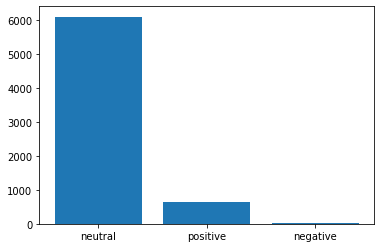

In [165]:
plt.bar(y_pred.value_counts().index,
        y_pred.value_counts())

Według vadera większość opini jest neutralna. Ten model nie sprawdzi się w przypadku moich danych.

Spróbuję metody Bag of Words, bo ngramy np. pary słów mogą uwiarygodnić sentyment

In [166]:
from sklearn.feature_extraction.text import CountVectorizer

In [167]:
def get_top_ngram(corpus, n=2, top_ngrams=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_ngrams]

In [168]:
bigrams = get_top_ngram(data["Review_clean"])

<AxesSubplot:>

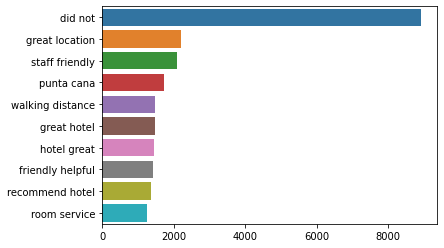

In [169]:
x,y=map(list,zip(*bigrams))
sns.barplot(x=y,y=x)

8. Bag of Words

In [170]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [171]:
def do_nothing(tokens):
    return tokens

bow_count = CountVectorizer(tokenizer=do_nothing,
                             preprocessor=None,
                             lowercase=False)

In [172]:
X_train_bow_count = bow_count.fit_transform(X_train)
X_test_bow_count = bow_count.transform(X_test)

In [173]:
clf = MultinomialNB()
clf.fit(X_train_bow_count, y_train)

MultinomialNB()

In [174]:
y_train_pred = clf.predict(X_train_bow_count)
y_test_pred = clf.predict(X_test_bow_count)
multiNB_bow_train_score = accuracy_score(y_train, y_train_pred)
multiNB_bow_test_score = accuracy_score(y_test, y_test_pred)
print(f"multiNB_bow_score na zbiorze treningowym: {multiNB_bow_train_score}")
print(f"multiNB_bow_score na zbiorze testowym: {multiNB_bow_test_score}")

multiNB_bow_score na zbiorze treningowym: 0.7642773892773893
multiNB_bow_score na zbiorze testowym: 0.5774064764157918


In [175]:
print(classification_report(y_test, y_test_pred, target_names=['1','2', '3', '4', '5']))

              precision    recall  f1-score   support

           1       0.79      0.38      0.51       477
           2       0.40      0.34      0.36       576
           3       0.31      0.07      0.12       710
           4       0.45      0.49      0.47      2052
           5       0.68      0.84      0.75      2948

    accuracy                           0.58      6763
   macro avg       0.52      0.42      0.44      6763
weighted avg       0.55      0.58      0.55      6763



Accuracy na zbiorze testowym ma tylko 0.57, model miał najwyższą precyzję przy ocenach brzegowych very bad tj. 1 i very good tj. 5, środkowe oceny było mu dużo trudniej trafić. Przy niezbilansowanym zbiorze accuracy nie będzie wiarygodną miarą. Recall najwyższy dla oceny 5 pokrywa się z wiedzą, że najwięcej ocen to 5. Wyniki dla oceny 3 są zastanawiająco niskie. 

In [176]:
from utils import plot_confusion_matrix

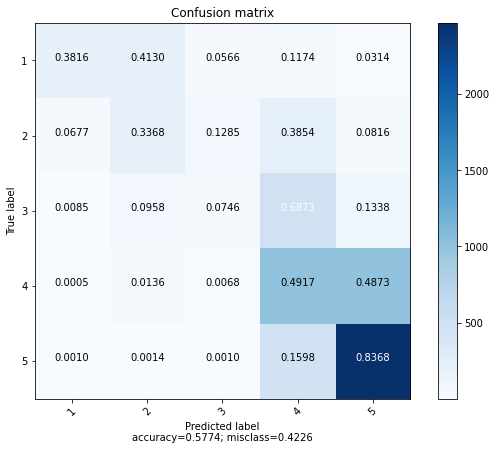

In [177]:
plot_confusion_matrix.plot_confusion_matrix(confusion_matrix(y_test, y_test_pred), target_names=['1','2', '3', '4', '5'])

Najlepsze dopasowanie dotyczyło najwyższej oceny - 5 stanowiły prawie połowę zbioru danych. Aby poprawić wyniki można zastosować tę metodę przy różnych n-gramach. W recenzjach wyrażenia 2 lub 3 elementowe mogą mieć duże znaczenie.

9. Bag of Words z użyciem miary TF-IDF (bierze pod uwagę istotność danego słowa w tekście)

In [178]:
from sklearn.feature_extraction.text import TfidfTransformer

In [179]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)

In [180]:
X_train_tfidf = tfidf.fit_transform(X_train_bow_count)
X_test_tfidf = tfidf.fit_transform(X_test_bow_count)

In [181]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [182]:
y_train_pred = clf.predict(X_train_tfidf)
y_test_pred = clf.predict(X_test_tfidf)
multiNB_bow_train_score = accuracy_score(y_train, y_train_pred)
multiNB_bow_test_score = accuracy_score(y_test, y_test_pred)
print(f"multiNB_bow_score na zbiorze treningowym: {multiNB_bow_train_score}")
print(f"multiNB_bow_score na zbiorze testowym: {multiNB_bow_test_score}")

multiNB_bow_score na zbiorze treningowym: 0.46408799533799533
multiNB_bow_score na zbiorze testowym: 0.4381191778796392


Wyniki są dużo niższe, nawet na zbiorze treningowym.

PODSUMOWANIE I CO WARTO ZROBIĆ/POPRAWIĆ

- z przetestowanych modeli najlepiej wypadł Bag of Words. Aby oprawić wyniki możnaby zastosować n-gramy o różnych rozmiarach.
- znaleźć błąd w textblobie, dodać kolumnę z wielkościami sentiment polarity i przypisać przedziały wartości do odpowiednich ocen od 1-5 (jednak wartości sentymentu dla recenzji o różnych ocenach były tak zbiżone, że albo coś robie nie tak albo ten model nie nadaje się do mojego przypadku)
- na początku warto byłoby zbilansować zbiór, aby w późniejszej ocenie modelu opierać się na miarze accuracy
- można byłoby znaleźć lematyzator nastawiony na recenzje tj. uwzględniający np stopniowanie przymiotników
- budowa własnego modelu
- zmiany parametrów gotowych modeli